## Lab 1 - KNN - k nearest neighbor

In this lab we will explore the KNN algorithm used for classification.

-	Given a classified data set X 
-	Calculate the distance to the unclassified point p
-	Pick the k nearest points in X
-	Classify p as the mean classification of the k-points
-	Calculate the quality as a percentage of the k-points belonging to the same class

The last åary


-------- DATA -------
X_train: (120, 4) - float64
y_train: (120,) - float64
X_test: (30, 4) - float64
y_test: (30,) - float64
----------------------
Acc: 1.0
X_prod: (1, 4) - float64 - First: [[5.1 0.6 3.  0.6]]
X_train: (4, 4) - float64 - First: [[5.5 2.4 3.7 1. ]]
[1]


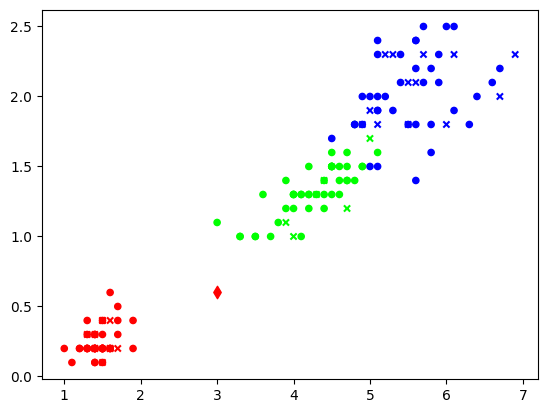

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


# Color schema for our three classe
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#print(X_train)

print("-------- DATA -------")
print(f"X_train: {X_train.shape} - {X_train.dtype}")
print(f"y_train: {y_train.shape} - {X_train.dtype}")
print(f"X_test: {X_test.shape} - {X_train.dtype}")
print(f"y_test: {y_test.shape} - {X_train.dtype}")
print("----------------------")

##########
# Print the train data to get some understanding
plt.scatter(X_train[:,2],X_train[:,3], c=y_train, cmap=cmap, s=20)

# Run the algo to calculate the nearest k and predict the text data
clf = KNN(k=5)
clf.fit(X_train, y_train)

#########
# Predict the test data
predictions = clf.predict(X_test)
plt.scatter(X_test[:,2],X_test[:,3], c=y_test,marker='x', cmap=cmap, s=20)

##########
# Calculate the quality - Will be a adding of booleans and the quota of how many correct classes where set
acc = np.sum(predictions == y_test) / len(y_test)
print(f"Acc: {acc}")


##########
# Test a single prod calculation - as a simulation of this being a real live example
X_prod = np.array([[5.1,0.6,3.,.6]])
print(f"X_prod: {X_prod.shape} - {X_prod.dtype} - First: {X_prod[0:1]}")
print(f"X_train: {X_train[0:4].shape} - {X_prod.dtype} - First: {X_train[0:1]}")

predictions = clf.predict(X_prod)
print(predictions)

#Plot our prod classification
plt.scatter(X_prod[:,2],X_prod[:,3],c=predictions,marker='d',cmap=cmap,s=40)

